# Make a map with the locations of the tide gauges and the salinity stations 

In [1]:
# import numpy as np

In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
import scipy
import pyepsg
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
#import cmocean
import matplotlib
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio import plot as rasterplot
#from pyschism.mesh import Hgrid
#import pyschism
from matplotlib.image import imread
#import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection
import geopandas as gpd
import re 
import contextily as cx
print("Modules imported!")


Modules imported!


In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
# import rioxarray


In [ ]:
# Basemap 
basemap = '/global/home/groups/fc_esdl/data/plotting/basemap_delta.tif'

In [ ]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

In [2]:
stations=gpd.read_file("/global/scratch/users/jennaisrael/Plotting/maps/shp_files/stations_stp/stations_stp.shp")

In [ ]:
stations

In [ ]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

# plot shapefiles
stations.plot(ax=ax, facecolor='w', edgecolor='k')
#plt.savefig('test.jpg')
plt.show()


In [ ]:
#to use a different color and shape for each station need to index the stations and do this in a loop
# see https://stackoverflow.com/questions/45829228/select-specific-regions-of-shp-file-using-geopandas for boolean indexing and 
# see for plotting in a loop https://stackoverflow.com/questions/52303660/iterating-markers-in-plots/52303895#52303895

In [ ]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

# plot shapefiles
stations.plot(ax=ax, column='name',cmap='tab20',legend=True)
#stations.plot(ax=ax, column='param',marker='o',legend=True)
#plt.savefig('test.jpg')
#plt.legend()
plt.show()


In [ ]:
#use cartopy to add the coastline
# from cartopy import config
# import cartopy.crs as ccrs
# UTM 10 projection system 
#proj_utm10 = 'EPSG:26910'
#crs_epsg = crs.epsg("3857")
crs_epsg = crs.epsg("26910")
#fig, ax = plt.subplots(1,subplot_kw={"projection": crs_epsg})#, figsize=(10, 5))
fig = plt.subplot()
ax = plt.axes(projection=crs_epsg)
## fig, axs = plt.subplots(subplot_kw={"projection": proj_utm10})#, figsize=(10, 5))
# fig= plt.subplots() #, figsize=(10, 5))
# ax = plt.subplot(132, projection=crs_epsg )

# fig= plt.subplots()
# ax = plt.axes(projection=ccrs.epsg("26910"))
# set a margin around the data
#img=plt.imread(basemap)
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 
#ax.imshow(basemap, origin='upper', extent=img_extent, transform=crs_epsg)
#ax.imshow(img)#, origin='upper')#, transform=crs_epsg)
# plot shapefiles

ax.coastlines(resolution='10m', color='black', linewidth=1)
stations.plot(ax=ax, column='name',cmap='tab20',legend=True, legend_kwds={'loc': 'lower right'})
plt.show()

In [ ]:
#use cartopy to add the coastline
#does increaing to 1 m coastline get the delta? Not possible, what if I add rivers?
crs_epsg = crs.epsg("26910")
fig = plt.subplot()
ax = plt.axes(projection=crs_epsg)
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 
#ax.coastlines(resolution='10m', color='black', linewidth=1)
SOURCE = 'Natural Earth'
LICENSE = 'public domain'
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
ax.add_feature(rivers_10m, facecolor='None', edgecolor='k')
ax.add_feature(cfeature.COASTLINE)
#ax.rivers(resolution='10m', color='black', linewidth=1)
#stations.plot(ax=ax, column='name',cmap='tab20',legend=True, legend_kwds={'loc': 'lower right'})
plt.show()

In [ ]:
#try doing this with a contextily basemap instead 


crs_epsg = crs.epsg("26910")
#fig = plt.subplot()
ax = plt.axes(projection=crs_epsg)
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)
# with rasterio.open(basemap) as src:
#                     i = show(src, transform = src.transform, cmap='binary', ax = ax) 
# #ax.coastlines(resolution='10m', color='black', linewidth=1)
# SOURCE = 'Natural Earth'
# LICENSE = 'public domain'
# rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
# ax.add_feature(rivers_10m, facecolor='None', edgecolor='k')
# ax.add_feature(cfeature.COASTLINE)
#ax.rivers(resolution='10m', color='black', linewidth=1)
stations.plot(ax=ax, column='name',cmap='tab20',legend=True, legend_kwds={'loc': 'lower right'})
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels,crs=crs_epsg)
plt.show()

In [9]:
from matplotlib.lines import Line2D

In [ ]:
west, south, east, north = (
    3.616218566894531,
    50.98912458110244,
    3.8483047485351562,
    51.13994019806845
             )



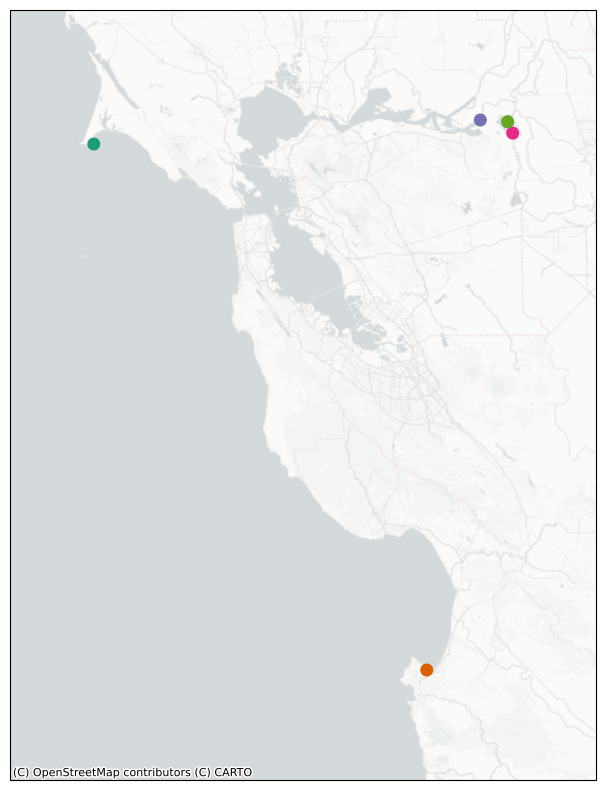

In [33]:
#Use a loop to plot the tide gauges separately from the salinity stations
crs_epsg = crs.epsg("26910")
fig=plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crs_epsg)
colors = plt.colormaps['Dark2'].colors #this is a tuple so need to use tuple indexing [rom][column]
col=0

#custom legend explained here https://github.com/geopandas/geopandas/issues/2279
color_dict= {'Point Reyes Tide Gauge': colors[0][:],
             'Monterey Tide Gauge': colors[1][:],
             'Jersey Point EC': colors[2][:],
             'Holland Cut EC': colors[3][:],
             'Franks Tract EC':colors[4][:]}
# color_dict= {'Point Reyes Tide Gauge': 'maroon',
#              'Monterey Tide Gauge': 'brown',
#              'Jersey Point EC': 'green',
#              'Holland Cut EC': 'skyblue',
#              'Franks Tract EC':'yellow'}
stations.plot(ax=ax,color=colors,markersize=70)
custom_points=[Line2D([0], [0],linestyle="none", markersize=10, marker="o", color=c) for c in color_dict.values()]
#download a tile to specify the extent of the map (currently cuts off the Delta)
north, west, east, south = (38.162,-123.132361,-121.253699,36.467850)
bd_img, bd_ext = cx.bounds2img(north,west,east,north,ll=True,source=cx.providers.CartoDB.PositronNoLabels)
#ax.imshow(bd_img, extent=bd_ext,crs=crs_epsg)
ax.set_xmargin(0.2)
ax.set_ymargin(0.20)
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels,crs=crs_epsg)
#cx.add_basemap(ax, source=bd_img, crs=crs_epsg)
#ax.legend(custom_points, color_dict.keys(),loc='center left')
plt.show
plt.savefig("/global/scratch/users/jennaisrael/Plotting/maps/maps/station_plot_no_legend.png")

In [ ]:
stations.name

In [ ]:
stations.loc[stations.name==s]

In [ ]:
col

In [ ]:
colors = plt.colormaps['Dark2'].colors
colors

In [ ]:
colors[0][:]

In [ ]:
str(stations.loc[stations.name==s].param.values)

In [ ]:
tcmap=plt.get_cmap('tab20')
#tcmap
colvect=tcmap[0,2,4,6,8]
colvect

In [ ]:
stations.name.values

In [ ]:
# station_fn = "/global/scratch/users/jennaisrael/run_schism/run_28/station.in"
# station_id =[]
# with open(station_fn) as f:
#     f.readline()
#     for station in range(int(f.readline())):
#         line = f.readline()
#         if '!' in line:
#             station_id.append(line.split('!')[-1])
#                     # else:
#                 #     station_id.append(None)

# stations = []
# for sublist in station_id:
#     match = re.search(r'"(.*?)"', sublist)
#     if match:
#         stations.append(match.group(1).strip())
#     else :
#         stations.append(sublist.replace("\n", "").strip())


# print("\nSTATION LIST:")
# for i, station in enumerate(stations):
#     print("#%d: %s" % (i,station))

In [ ]:
#166: Holland Cut at Holland Marina
#19: Jersey Point
#199: Franks Tract, Mid Tract


In [ ]:
station_file=pd.read_csv(station_fn)
station_file